<a href="https://colab.research.google.com/github/Dan5049/MPC-MLF/blob/main/Miniproject/MLF_Miniproject_Havranek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MPA-MLF Miniproject**
# Classification of wireless transmitters
### Daniel Havránek

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.datasets import cifar10
from keras.utils import to_categorical, plot_model, model_to_dot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from keras.backend import clear_session

x_validation = pd.read_csv('drive/MyDrive/Colab Notebooks/x_test.csv')
x_in = pd.read_csv('drive/MyDrive/Colab Notebooks/x_train.csv')
y_in = pd.read_csv('drive/MyDrive/Colab Notebooks/y_train.csv')

x_train, x_test, y_train, y_test = train_test_split(x_in, y_in, test_size = 0.2)
x_train = x_train.drop("Unnamed: 0", axis=1)
x_train = x_train.drop("m_power", axis=1)
x_train = x_train.drop("Tosc", axis=1)
x_train = x_train.drop("Tmix", axis=1)
x_test = x_test.drop("Unnamed: 0", axis=1)
x_test = x_test.drop("m_power", axis=1)
x_test = x_test.drop("Tosc", axis=1)
x_test = x_test.drop("Tmix", axis=1)
y_train = y_train.drop("id", axis=1)
y_test = y_test.drop("id", axis=1)

x_val = x_validation.drop("Unnamed: 0", axis=1)
x_val = x_val.drop("m_power", axis=1)
x_val = x_val.drop("Tosc", axis=1)
x_val = x_val.drop("Tmix", axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


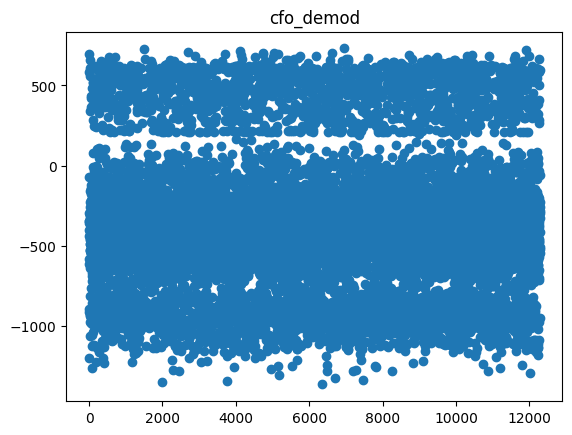

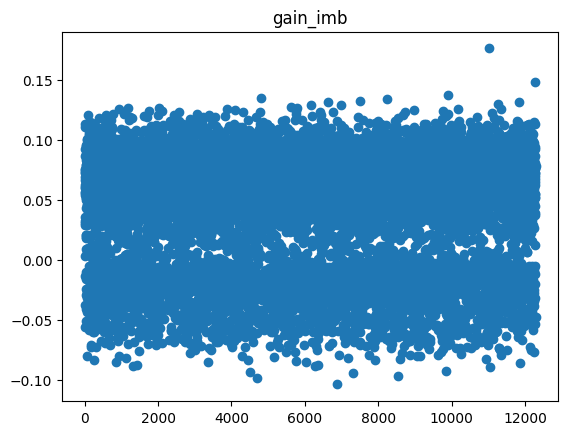

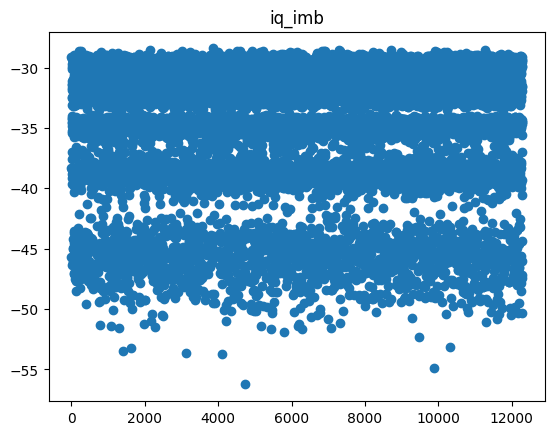

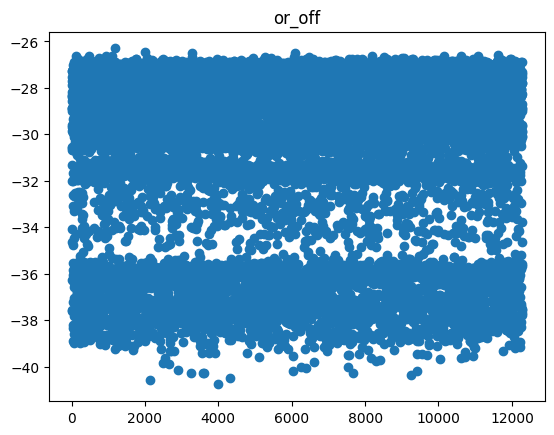

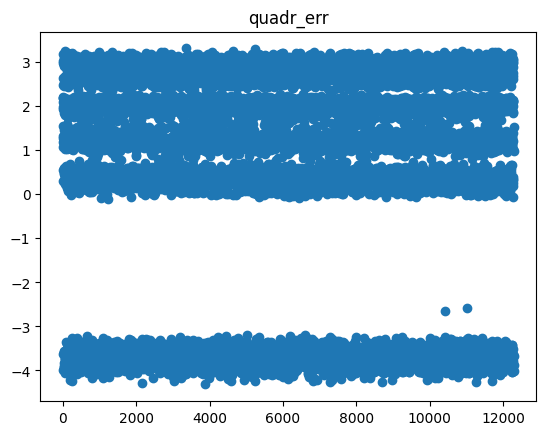

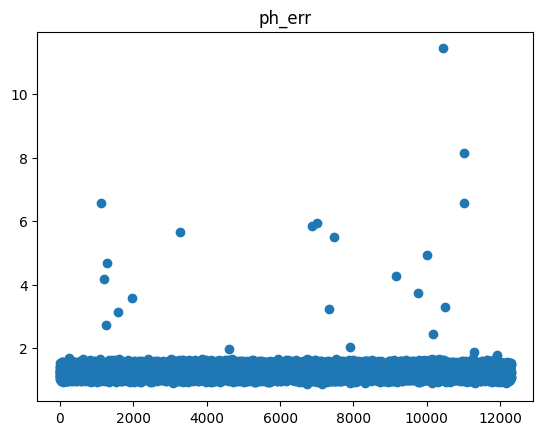

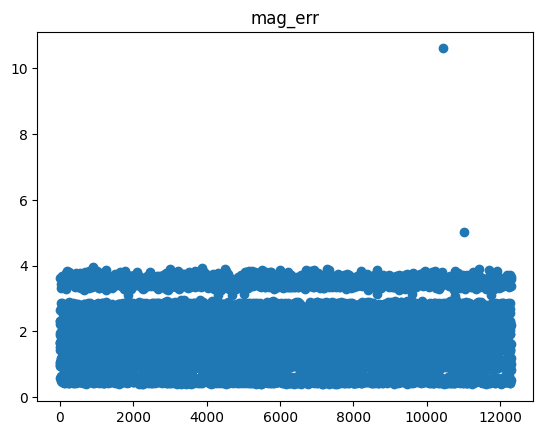

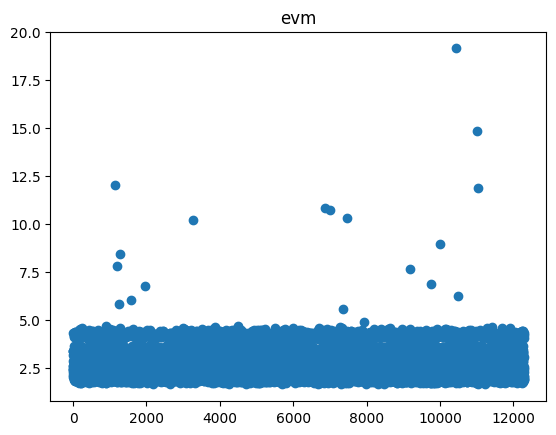

In [2]:
plt.figure()
plt.title("cfo_demod")
cfo_demod = x_train.cfo_demod
plt.scatter(range(len(cfo_demod)),cfo_demod)
plt.show()

plt.figure()
plt.title("gain_imb")
gain_imb = x_train.gain_imb
plt.scatter(range(len(gain_imb)), gain_imb)
plt.show()

plt.figure()
plt.title("iq_imb")
iq_imb = x_train.iq_imb
plt.scatter(range(len(iq_imb)),iq_imb)
plt.show()

plt.figure()
plt.title("or_off")
or_off = x_train.or_off
plt.scatter(range(len(or_off)), or_off)
plt.show()

plt.figure()
plt.title("quadr_err")
quadr_err = x_train.quadr_err
plt.scatter(range(len(quadr_err)),quadr_err)
plt.show()

plt.figure()
plt.title("ph_err")
ph_err = x_train.ph_err
plt.scatter(range(len(ph_err)), ph_err)
plt.show()

plt.figure()
plt.title("mag_err")
mag_err = x_train.mag_err
plt.scatter(range(len(mag_err)),mag_err)
plt.show()

plt.figure()
plt.title("evm")
evm = x_train.evm
plt.scatter(range(len(evm)), evm)
plt.show()

In [3]:
#labels = {0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven'}
n_classes = 8

x_train_scaled = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_scaled = (x_test - x_test.min()) / (x_test.max() - x_test.min())
x_val_scaled = (x_val - x_val.min()) / (x_val.max() - x_val.min())

y_train_0 = y_train - 1
y_train_encoded = to_categorical(y_train_0.to_numpy().reshape(-1,1), num_classes=n_classes)
y_test_0 = y_test - 1
y_test_encoded = to_categorical(y_test_0.to_numpy().reshape(-1,1), num_classes=n_classes)

In [4]:
model = Sequential()
model.add(Dense(512, input_dim=8, activation='sigmoid'))
model.add(Dropout(0.01, input_shape=(8,)))
#model.add(Dense(512, input_dim=8, activation='sigmoid'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4608      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 8,712
Trainable params: 8,712
Non-trainable params: 0
_________________________________________________________________


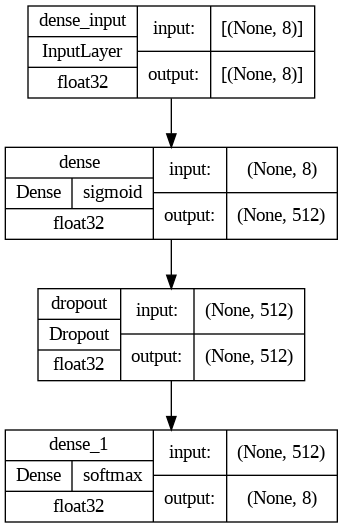

In [5]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=False,
)

In [6]:
optimizer = SGD(learning_rate = 0.1)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train_encoded, epochs=20, batch_size=16, validation_split = 0.2, verbose=1)

Epoch 1/20
615/615 [==============================] - 9s 9ms/step - loss: 2.4085 - accuracy: 0.2213 - val_loss: 2.1811 - val_accuracy: 0.2518
Epoch 2/20
615/615 [==============================] - 3s 5ms/step - loss: 1.3957 - accuracy: 0.4431 - val_loss: 1.2655 - val_accuracy: 0.5785
Epoch 3/20
615/615 [==============================] - 3s 5ms/step - loss: 0.8416 - accuracy: 0.6880 - val_loss: 0.5747 - val_accuracy: 0.8849
Epoch 4/20
615/615 [==============================] - 2s 3ms/step - loss: 0.5574 - accuracy: 0.8317 - val_loss: 0.6106 - val_accuracy: 0.6831
Epoch 5/20
615/615 [==============================] - 2s 3ms/step - loss: 0.4021 - accuracy: 0.8949 - val_loss: 0.3941 - val_accuracy: 0.9162
Epoch 6/20
615/615 [==============================] - 2s 3ms/step - loss: 0.3064 - accuracy: 0.9350 - val_loss: 0.2578 - val_accuracy: 0.9373
Epoch 7/20
615/615 [==============================] - 2s 4ms/step - loss: 0.2528 - accuracy: 0.9534 - val_loss: 0.2721 - val_accuracy: 0.8710
Epoch 

In [7]:
score = model.evaluate(x_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.6918225884437561
Test accuracy: 86.97916865348816 %


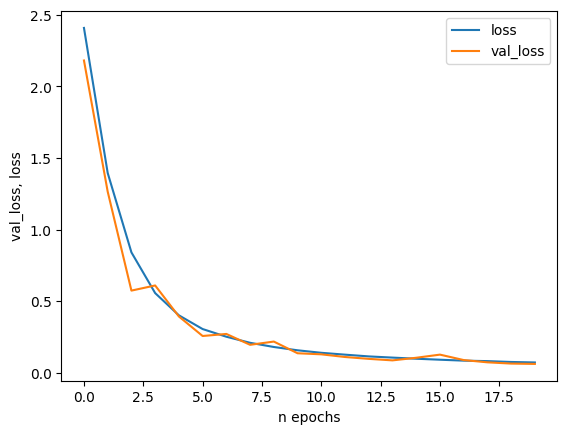

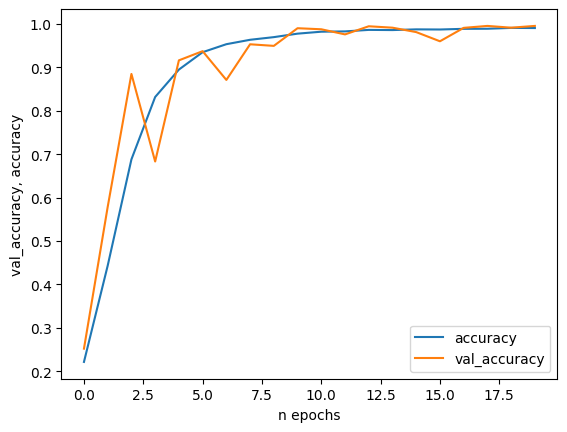

In [8]:
plt.figure()
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(loc="upper right")
plt.xlabel('n epochs')
plt.ylabel('val_loss, loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend(loc="lower right")
plt.xlabel('n epochs')
plt.ylabel('val_accuracy, accuracy')
plt.show()

120/120 [==============================] - 0s 2ms/step


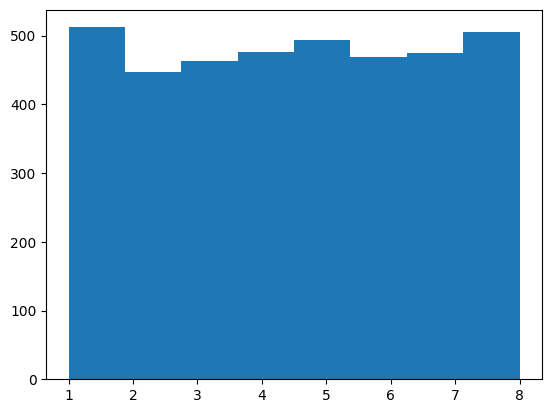

In [9]:
prediction = model.predict(x_val_scaled)

ind = np.argmax(prediction, axis=1)
res = ind + 1
result = pd.DataFrame({'id': np.arange(0, len(res)), 'target': res})
result = result.drop("id", axis=1)
result.index.name = 'id'

plt.figure()
plt.hist(result, bins=8)
plt.show()

In [10]:
from google.colab import files
result.to_csv('result.csv') 
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>